TypeError: datetime64 type does not support sum operations

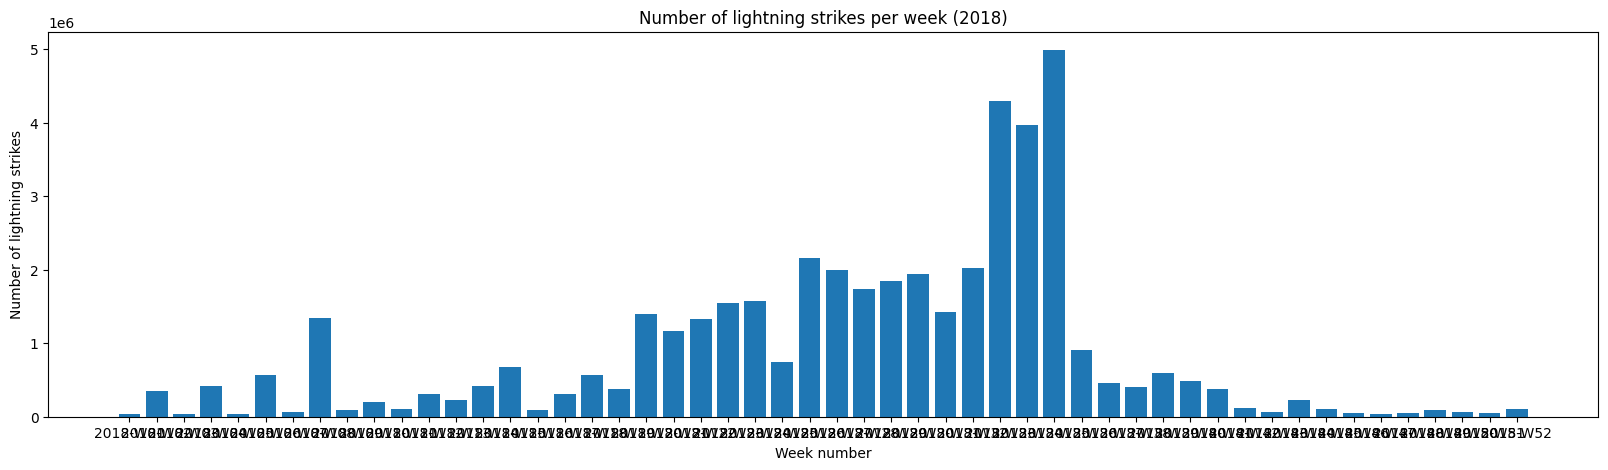

In [3]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# read in the data.
df = pd.read_csv('C:\\Users\\css7c\\OneDrive\\Desktop\\Coursera Data Analytics Certificate\\COURSE 3 - Go Beyond the Numbers Translate Data ino Insights\\eda_manipulate_date_strings_with_python.csv')

#=============
# Note: df stands for 'data frame' which is a fancy way of saying a 2d table with rows/columns
#=============

# Convert the 'date' column to datetime.
df['date'] = pd.to_datetime(df['date'])

# Create four new columns: week, month, quarter, and year. We can do this by using the 
# datetime.strftime() method of the datetime object. strftime is short for "string format time."
# the V in the '%Y-W%V' format string stands for the ISO week number. e.g. '2024-W01'
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

df.head(10)

# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

# In pandas v.2.X+ you must set 'numeric_only=True' in the sum() function or else it will throw an error

# Plot a bar graph of weekly strike totals in 2018.
plt.figure(figsize = (20, 5)) # Increase output size of the x axis labels
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

# plot lightning strikes by quarter for the full date range of available data. 
# For a visualization, it will be easiest to work with numbers in millions, 
# such as 25.2 million. As an example, the following code will divide the 
# number_of_strikes column by one million.
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()


# This alone does not help much, because it just moved the decimal to the left. 
# We will need to format the numbers as well. Let's begin by grouping the data 
# by quarter and summing. Then, we will create a number_of_strikes_formatted 
# column in the resulting dataframe by dividing by one million but also 
# rounding to one digit after the decimal point, converting it to a string, 
# and adding "M" to the end to represent millions.

# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum().reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'
df_by_quarter.head()

# Helper function that labels each bar in the plot
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')


# Plot the bar graph
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

# Now, we will create a grouped bar chart to better compare year-over-year 
# changes each quarter. We can do this by creating two new columns that break 
# out the quarter and year from the quarter column. We will use the quarter 
# column and take the last two characters to get quarter_number, and take the 
# first four characters to get year.

# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

# Fill in bar chart parameters
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()